# QB Stats

# Importing required packages

In [1]:
# Import data scraping modules
from urllib.request import urlopen
from bs4 import BeautifulSoup

# Import data manipulation modules
import pandas as pd
import numpy as np

# Import data visualization modules
import matplotlib as mpl
import matplotlib.pyplot as plt

# Open URL with BeautifulSoup

In [2]:
# URL of page
url = 'https://www.pro-football-reference.com/years/2022/passing.htm'

# Open URL and pass to BeautifulSoup
html = urlopen(url)
passingStatsPage = BeautifulSoup(html)

# Create array of column names

In [3]:
# Collect table headers
columnHeaders = passingStatsPage.findAll('tr')[0]
columnHeaders = [i.getText() for i in columnHeaders.findAll('th')]
print(columnHeaders)

['Rk', 'Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%', 'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C', 'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'Sk%', 'NY/A', 'ANY/A', '4QC', 'GWD']


# Extract the data from the website

In [4]:
# Collect table rows
rows = passingStatsPage.findAll('tr')[1:]

# Get stats from each row
qbStats = []
for i in range(len(rows)):
    qbStats.append([col.getText() for col in rows[i].findAll('td')])
print(qbStats[0])

['Patrick Mahomes*+', 'KAN', '27', 'QB', '17', '17', '14-3-0', '435', '648', '67.1', '5250', '41', '6.3', '12', '1.9', '272', '67', '8.1', '8.5', '12.1', '308.8', '105.2', '77.6', '26', '188', '3.9', '7.51', '7.93', '4', '4']


# Turn scraped data into a pandas DataFrame

In [5]:
# Create DataFrame from our scraped data
data = pd.DataFrame(qbStats, columns=columnHeaders[1:])

# Examine first couple rows of our DataFrame


In [6]:
# Examine 5 rows of data
data.head() # .head() default is 5 rows

,Player,Tm,Age,Pos,G,GS,QBrec,Cmp,Att,Cmp%,...,Y/G,Rate,QBR,Sk,Yds,Sk%,NY/A,ANY/A,4QC,GWD
0,Patrick Mahomes*+,KAN,27,QB,17,17,14-3-0,435,648,67.1,...,308.8,105.2,77.6,26,188,3.9,7.51,7.93,4,4
1,Justin Herbert,LAC,24,QB,17,17,10-7-0,477,699,68.2,...,278.8,93.2,58.2,38,206,5.2,6.15,6.22,4,5
2,Tom Brady,TAM,45,QB,17,17,8-9-0,490,733,66.8,...,276.1,90.7,52.5,22,160,2.9,6.01,6.13,4,5
3,Kirk Cousins*,MIN,34,QB,17,17,13-4-0,424,643,65.9,...,267.5,92.5,49.9,46,329,6.7,6.12,6.05,8,8
4,Joe Burrow*,CIN,26,QB,16,16,12-4-0,414,606,68.3,...,279.7,100.8,58.7,41,259,6.3,6.52,6.76,3,4


In [7]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds', 'Sk%', 'NY/A', 'ANY/A', '4QC',
       'GWD'],
      dtype='object')

# Make a new column called Yds_Sack to differentiate from passing yards

In [8]:
# Rename sack yards column to `Yds_Sack`
new_columns = data.columns.values
new_columns[-6] = 'Yds_Sack'
data.columns = new_columns

# Examine the new columns of our DataFrame

In [9]:
# View columns in data
data.columns

Index(['Player', 'Tm', 'Age', 'Pos', 'G', 'GS', 'QBrec', 'Cmp', 'Att', 'Cmp%',
       'Yds', 'TD', 'TD%', 'Int', 'Int%', '1D', 'Lng', 'Y/A', 'AY/A', 'Y/C',
       'Y/G', 'Rate', 'QBR', 'Sk', 'Yds_Sack', 'Sk%', 'NY/A', 'ANY/A', '4QC',
       'GWD'],
      dtype='object')

# Stat categories we are going to plot

In [10]:
# Select stat categories
categories = ['Cmp%', 'Yds', 'TD', 'Int', 'Y/A', 'Rate']
# Create data subset for radar chart
dataRadar = data[['Player', 'Tm'] + categories]
dataRadar.head()

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Patrick Mahomes*+,KAN,67.1,5250,41,12,8.1,105.2
1,Justin Herbert,LAC,68.2,4739,25,10,6.8,93.2
2,Tom Brady,TAM,66.8,4694,25,9,6.4,90.7
3,Kirk Cousins*,MIN,65.9,4547,29,14,7.1,92.5
4,Joe Burrow*,CIN,68.3,4475,35,12,7.4,100.8


# Examine data types in our DataFrame

In [11]:
# Check data types
dataRadar.dtypes

Player    object
Tm        object
Cmp%      object
Yds       object
TD        object
Int       object
Y/A       object
Rate      object
dtype: object

# Convert the columns we are going to plot from objects to numerical data

In [12]:
# Convert data to numerical values
for i in categories:
    dataRadar[i] = pd.to_numeric(data[i])

/var/folders/xy/4v7zn2r56bs0xvb_7f8l19c80000gn/T/ipykernel_68946/1033440573.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRadar[i] = pd.to_numeric(data[i])


# Examine the data types after conversion to numerical values

In [13]:
# Check data types
dataRadar.dtypes

Player     object
Tm         object
Cmp%      float64
Yds       float64
TD        float64
Int       float64
Y/A       float64
Rate      float64
dtype: object

# Remove Unwanted characters

In [14]:
# Remove ornamental characters for achievements
dataRadar['Player'] = dataRadar['Player'].str.replace('*', '')
dataRadar['Player'] = dataRadar['Player'].str.replace('+', '')
dataRadar.head(40)


/var/folders/xy/4v7zn2r56bs0xvb_7f8l19c80000gn/T/ipykernel_68946/246595980.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataRadar['Player'] = dataRadar['Player'].str.replace('*', '')
/var/folders/xy/4v7zn2r56bs0xvb_7f8l19c80000gn/T/ipykernel_68946/246595980.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRadar['Player'] = dataRadar['Player'].str.replace('*', '')
/var/folders/xy/4v7zn2r56bs0xvb_7f8l19c80000gn/T/ipykernel_68946/246595980.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expre

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate
0,Patrick Mahomes,KAN,67.1,5250.0,41.0,12.0,8.1,105.2
1,Justin Herbert,LAC,68.2,4739.0,25.0,10.0,6.8,93.2
2,Tom Brady,TAM,66.8,4694.0,25.0,9.0,6.4,90.7
3,Kirk Cousins,MIN,65.9,4547.0,29.0,14.0,7.1,92.5
4,Joe Burrow,CIN,68.3,4475.0,35.0,12.0,7.4,100.8
5,Jared Goff,DET,65.1,4438.0,29.0,7.0,7.6,99.3
6,Josh Allen,BUF,63.3,4283.0,35.0,14.0,7.6,96.6
7,Geno Smith,SEA,69.8,4282.0,30.0,11.0,7.5,100.9
8,Trevor Lawrence,JAX,66.3,4113.0,25.0,8.0,7.0,95.2
9,Jalen Hurts,PHI,66.5,3701.0,22.0,6.0,8.0,101.5


# Filter to QBs who have thrown > 1000 passing yards

In [15]:
# Filter by passing yards
dataRadarFiltered = dataRadar[dataRadar['Yds'] > 1000]

# Calculate statistical ranks based on percentile

In [16]:
# Create columns with percentile rank
for i in categories:
    dataRadarFiltered[i + '_Rank'] = dataRadarFiltered[i].rank(pct=True)

# We need to flip the rank for interceptions
dataRadarFiltered['Int_Rank'] = 1 - dataRadarFiltered['Int_Rank']
# Examine data
dataRadarFiltered.head()

/var/folders/xy/4v7zn2r56bs0xvb_7f8l19c80000gn/T/ipykernel_68946/1332431741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRadarFiltered[i + '_Rank'] = dataRadarFiltered[i].rank(pct=True)
/var/folders/xy/4v7zn2r56bs0xvb_7f8l19c80000gn/T/ipykernel_68946/1332431741.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataRadarFiltered[i + '_Rank'] = dataRadarFiltered[i].rank(pct=True)
/var/folders/xy/4v7zn2r56bs0xvb_7f8l19c80000gn/T/ipykernel_68946/1332431741.py:3: SettingWithCopyWarning: 
A value is 

,Player,Tm,Cmp%,Yds,TD,Int,Y/A,Rate,Cmp%_Rank,Yds_Rank,TD_Rank,Int_Rank,Y/A_Rank,Rate_Rank
0,Patrick Mahomes,KAN,67.1,5250.0,41.0,12.0,8.1,105.2,0.8375,1.000,1.0000,0.175,0.9375,0.9500
1,Justin Herbert,LAC,68.2,4739.0,25.0,10.0,6.8,93.2,0.9500,0.975,0.7875,0.325,0.3250,0.7000
2,Tom Brady,TAM,66.8,4694.0,25.0,9.0,6.4,90.7,0.7750,0.950,0.7875,0.400,0.1125,0.5250
3,Kirk Cousins,MIN,65.9,4547.0,29.0,14.0,7.1,92.5,0.6250,0.925,0.8875,0.075,0.5750,0.6375
4,Joe Burrow,CIN,68.3,4475.0,35.0,12.0,7.4,100.8,0.9750,0.900,0.9625,0.175,0.7125,0.8500


In [17]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 16
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['xtick.major.pad'] = 15


# Dictionary of team colors

In [18]:
teamColors = {'ARI':'#97233f', 'ATL':'#a71930', 'BAL':'#241773', 'BUF':'#00338d',
               'CAR':'#0085ca', 'CHI':'#0b162a', 'CIN':'#fb4f14', 'CLE':'#311d00',
               'DAL':'#041e42', 'DEN':'#002244', 'DET':'#0076b6', 'GNB':'#203731',
               'HOU':'#03202f', 'IND':'#002c5f', 'JAX':'#006778', 'KAN':'#e31837',
               'LAC':'#002a5e', 'LAR':'#003594', 'MIA':'#008e97', 'MIN':'#4f2683',
               'NWE':'#002244', 'NOR':'#d3bc8d', 'NYG':'#0b2265', 'NYJ':'#125740',
               'LVR':'#000000', 'PHI':'#004c54', 'PIT':'#ffb612', 'SFO':'#aa0000',
               'SEA':'#002244', 'TAM':'#d50a0a', 'TEN':'#0c2340', 'WAS':'#773141'}

# Create array of angles for our radar plot

In [19]:
# Calculate angles for radar chart
offset = np.pi/6
angles = np.linspace(0, 2*np.pi, len(categories) + 1) + offset

In [20]:
# Function to create radar chart
def createRadarChart(ax, angles, playerData, color='blue'):
    
    # Plot data and fill with team color
    ax.plot(angles, np.append(playerData[-(len(angles)-1):], playerData[-(len(angles)-1)]), color=color, linewidth=2)
    ax.fill(angles, np.append(playerData[-(len(angles)-1):], playerData[-(len(angles)-1)]), color=color, alpha=0.2)
    
    # Set category labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    
    # Remove radial labels
    ax.set_yticklabels([])

    # Add player name
    ax.text(np.pi/2, 1.7, playerData[0], ha='center', va='center', size=18, color=color)
    
    # Use white grid
    ax.grid(color='white', linewidth=1.5)

    # Set axis limits
    ax.set(xlim=(0, 2*np.pi), ylim=(0, 1))

    return ax

In [21]:
# Function to get QB data
def getQbData(data, team):
    return np.asarray(data[data['Tm'] == team])[0]

# NFC West

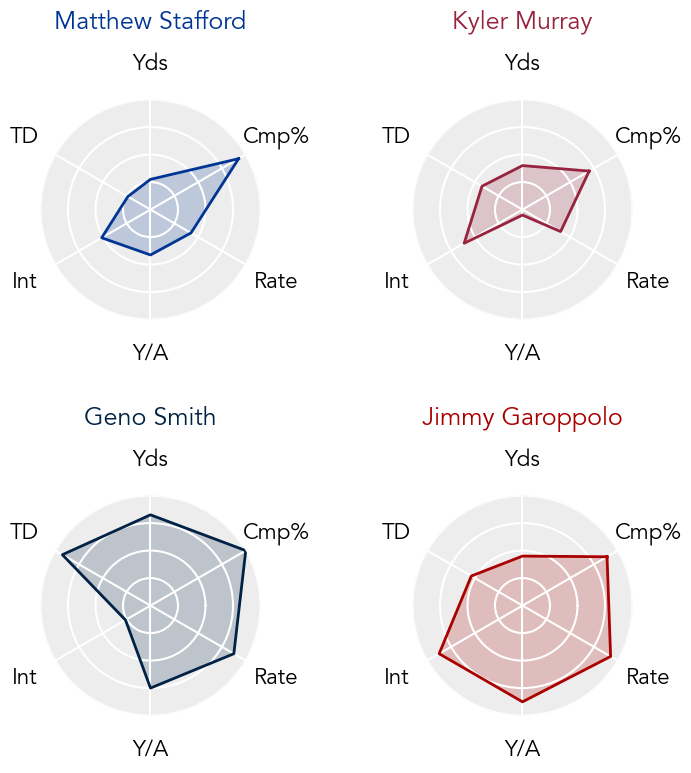

In [22]:
# NFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
sfData = getQbData(dataRadarFiltered, 'SFO')
seaData = getQbData(dataRadarFiltered, 'SEA')
ariData = getQbData(dataRadarFiltered, 'ARI')
larData = getQbData(dataRadarFiltered, 'LAR')

# Plot QB data
ax1 = createRadarChart(ax1, angles, larData, teamColors['LAR'])
ax2 = createRadarChart(ax2, angles, ariData, teamColors['ARI'])
ax3 = createRadarChart(ax3, angles, seaData, teamColors['SEA'])
ax4 = createRadarChart(ax4, angles, sfData, teamColors['SFO'])

plt.show()

# NFC North

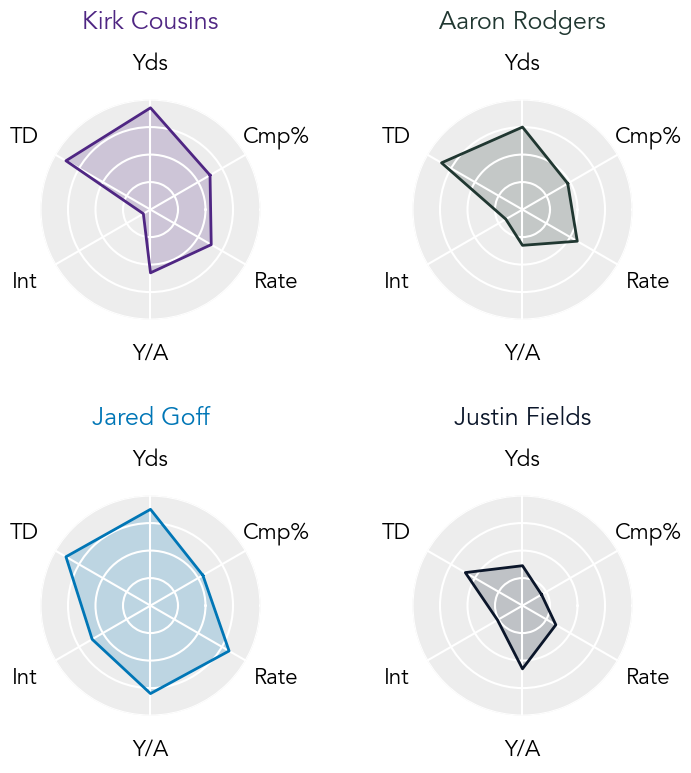

In [23]:
# NFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
minData = getQbData(dataRadarFiltered, 'MIN')
gnbData = getQbData(dataRadarFiltered, 'GNB')
detData = getQbData(dataRadarFiltered, 'DET')
chiData = getQbData(dataRadarFiltered, 'CHI')

# Plot QB data
ax1 = createRadarChart(ax1, angles, minData, teamColors['MIN'])
ax2 = createRadarChart(ax2, angles, gnbData, teamColors['GNB'])
ax3 = createRadarChart(ax3, angles, detData, teamColors['DET'])
ax4 = createRadarChart(ax4, angles, chiData, teamColors['CHI'])

plt.show()

# NFC East

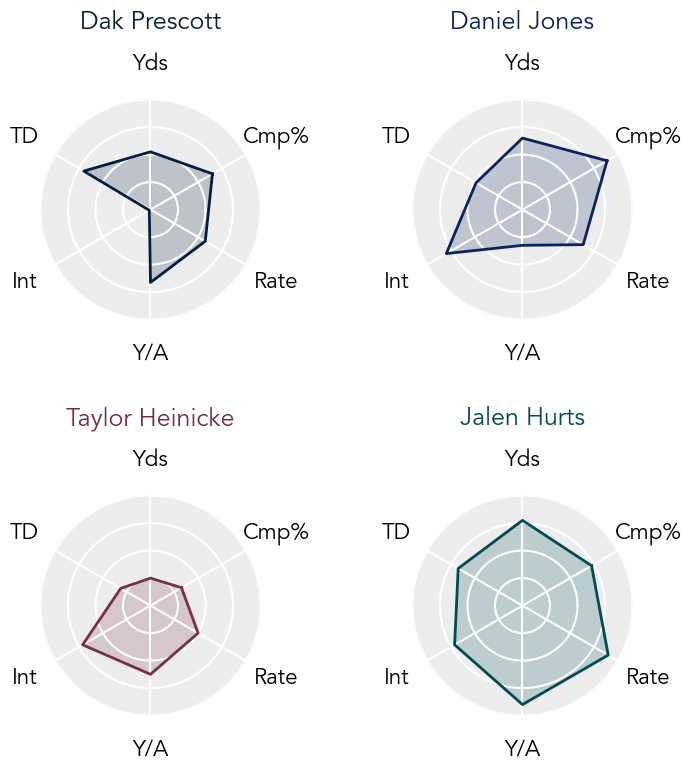

In [24]:
# NFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
dalData = getQbData(dataRadarFiltered, 'DAL')
nygData = getQbData(dataRadarFiltered, 'NYG')
wasData = getQbData(dataRadarFiltered, 'WAS')
phiData = getQbData(dataRadarFiltered, 'PHI')

# Plot QB data
ax1 = createRadarChart(ax1, angles, dalData, teamColors['DAL'])
ax2 = createRadarChart(ax2, angles, nygData, teamColors['NYG'])
ax3 = createRadarChart(ax3, angles, wasData, teamColors['WAS'])
ax4 = createRadarChart(ax4, angles, phiData, teamColors['PHI'])

plt.show()

# NFC South

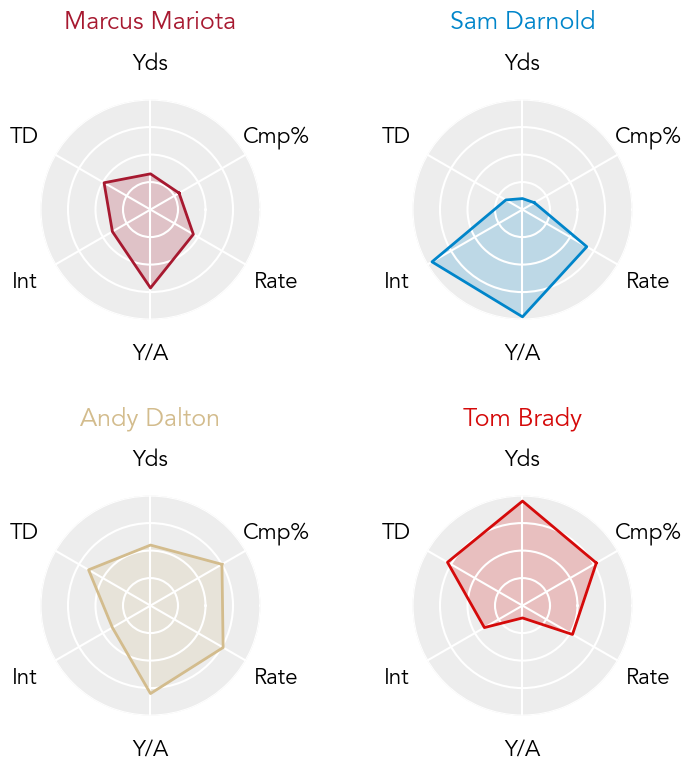

In [25]:
# NFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
atlData = getQbData(dataRadarFiltered, 'ATL')
carData = getQbData(dataRadarFiltered, 'CAR')
norData = getQbData(dataRadarFiltered, 'NOR')
tamData = getQbData(dataRadarFiltered, 'TAM')

# Plot QB data
ax1 = createRadarChart(ax1, angles, atlData, teamColors['ATL'])
ax2 = createRadarChart(ax2, angles, carData, teamColors['CAR'])
ax3 = createRadarChart(ax3, angles, norData, teamColors['NOR'])
ax4 = createRadarChart(ax4, angles, tamData, teamColors['TAM'])

plt.show()

# AFC West

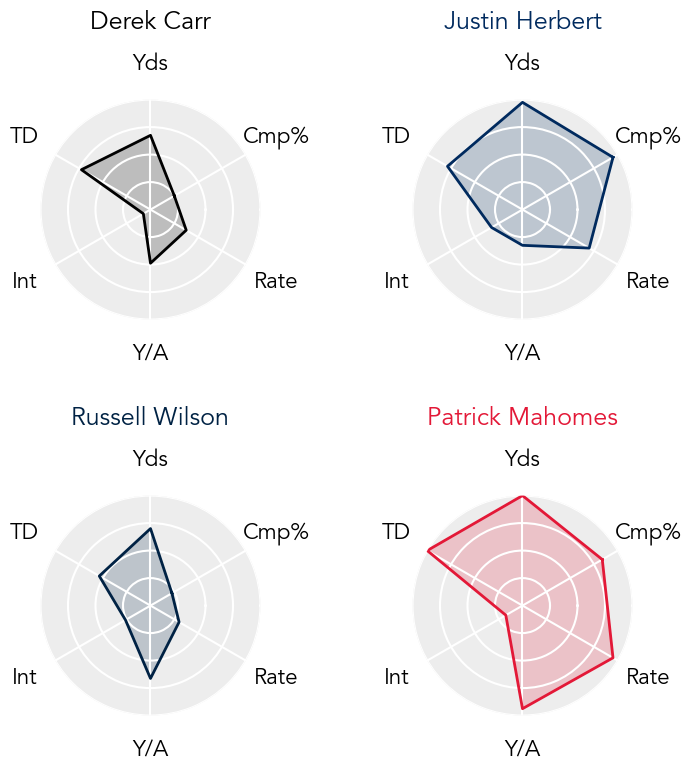

In [26]:
# AFC West
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
oak_data = getQbData(dataRadarFiltered, 'LVR')
lac_data = getQbData(dataRadarFiltered, 'LAC')
den_data = getQbData(dataRadarFiltered, 'DEN')
kan_data = getQbData(dataRadarFiltered, 'KAN')

# Plot QB data
ax1 = createRadarChart(ax1, angles, oak_data, teamColors['LVR'])
ax2 = createRadarChart(ax2, angles, lac_data, teamColors['LAC'])
ax3 = createRadarChart(ax3, angles, den_data, teamColors['DEN'])
ax4 = createRadarChart(ax4, angles, kan_data, teamColors['KAN'])

plt.show()

# AFC North

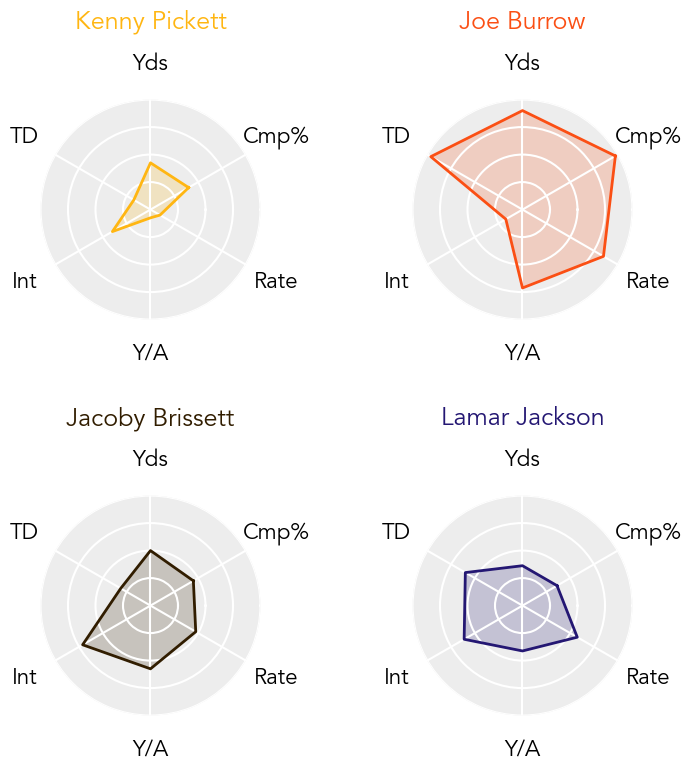

In [27]:
# AFC North
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
pit_data = getQbData(dataRadarFiltered, 'PIT')
cin_data = getQbData(dataRadarFiltered, 'CIN')
cle_data = getQbData(dataRadarFiltered, 'CLE')
bal_data = getQbData(dataRadarFiltered, 'BAL')

# Plot QB data
ax1 = createRadarChart(ax1, angles, pit_data, teamColors['PIT'])
ax2 = createRadarChart(ax2, angles, cin_data, teamColors['CIN'])
ax3 = createRadarChart(ax3, angles, cle_data, teamColors['CLE'])
ax4 = createRadarChart(ax4, angles, bal_data, teamColors['BAL'])

plt.show()

# AFC East

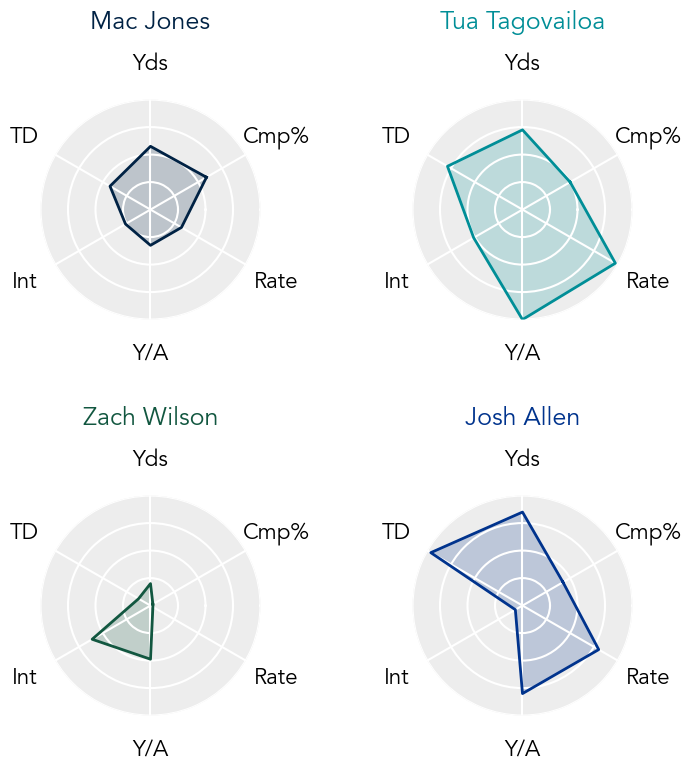

In [28]:
# AFC East
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
nwe_data = getQbData(dataRadarFiltered, 'NWE')
mia_data = getQbData(dataRadarFiltered, 'MIA')
nyj_data = getQbData(dataRadarFiltered, 'NYJ')
buf_data = getQbData(dataRadarFiltered, 'BUF')

# Plot QB data
ax1 = createRadarChart(ax1, angles, nwe_data, teamColors['NWE'])
ax2 = createRadarChart(ax2, angles, mia_data, teamColors['MIA'])
ax3 = createRadarChart(ax3, angles, nyj_data, teamColors['NYJ'])
ax4 = createRadarChart(ax4, angles, buf_data, teamColors['BUF'])

plt.show()

# AFC South

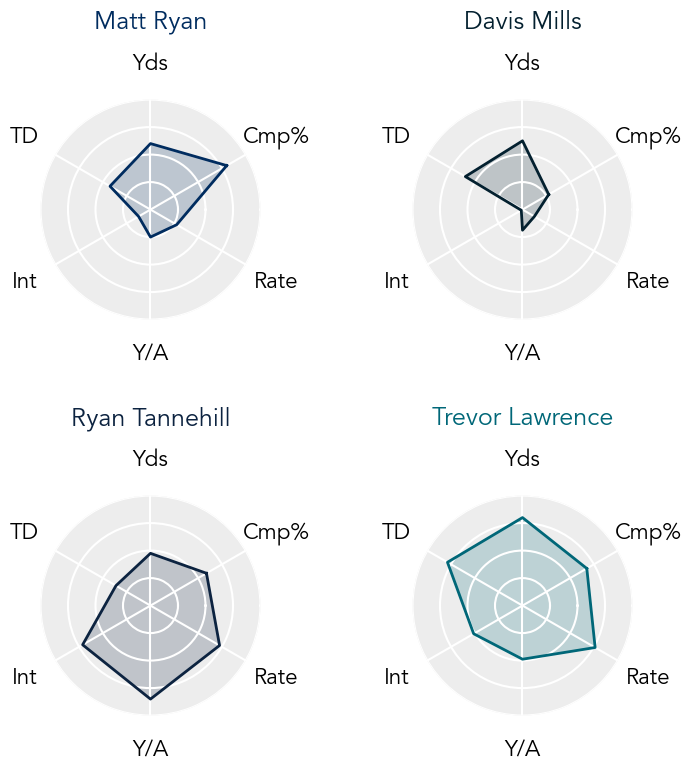

In [29]:
# AFC South
# Create figure
fig = plt.figure(figsize=(8, 8), facecolor='white')

# Add subplots
ax1 = fig.add_subplot(221, projection='polar', facecolor='#ededed')
ax2 = fig.add_subplot(222, projection='polar', facecolor='#ededed')
ax3 = fig.add_subplot(223, projection='polar', facecolor='#ededed')
ax4 = fig.add_subplot(224, projection='polar', facecolor='#ededed')

# Adjust space between subplots
plt.subplots_adjust(hspace=0.8, wspace=0.5)

# Get QB data
ind_data = getQbData(dataRadarFiltered, 'IND')
hou_data = getQbData(dataRadarFiltered, 'HOU')
ten_data = getQbData(dataRadarFiltered, 'TEN')
jax_data = getQbData(dataRadarFiltered, 'JAX')

# Plot QB data
ax1 = createRadarChart(ax1, angles, ind_data, teamColors['IND'])
ax2 = createRadarChart(ax2, angles, hou_data, teamColors['HOU'])
ax3 = createRadarChart(ax3, angles, ten_data, teamColors['TEN'])
ax4 = createRadarChart(ax4, angles, jax_data, teamColors['JAX'])

plt.show()